<a href="https://colab.research.google.com/github/omkar-salunke/Physics_informed_neural_network/blob/main/RUL_turbofan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://ti.arc.nasa.gov/m/project/prognostic-repository/CMAPSSData.zip

--2021-09-26 11:14:51--  https://ti.arc.nasa.gov/m/project/prognostic-repository/CMAPSSData.zip
Resolving ti.arc.nasa.gov (ti.arc.nasa.gov)... 128.102.105.66, 2001:4d0:6311:2227:14b6:372b:2078:2a94
Connecting to ti.arc.nasa.gov (ti.arc.nasa.gov)|128.102.105.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12425978 (12M) [application/zip]
Saving to: ‘CMAPSSData.zip’

CMAPSSData.zip      100%[===================>]  11.85M  56.9MB/s    in 0.2s    

2021-09-26 11:14:51 (56.9 MB/s) - ‘CMAPSSData.zip’ saved [12425978/12425978]



In [ ]:
!unzip /content/CMAPSSData.zip

Archive:  /content/CMAPSSData.zip
  inflating: Damage Propagation Modeling.pdf  
  inflating: readme.txt              
  inflating: RUL_FD001.txt           
  inflating: RUL_FD002.txt           
  inflating: RUL_FD003.txt           
  inflating: RUL_FD004.txt           
  inflating: test_FD001.txt          
  inflating: test_FD002.txt          
  inflating: test_FD003.txt          
  inflating: test_FD004.txt          
  inflating: train_FD001.txt         
  inflating: train_FD002.txt         
  inflating: train_FD003.txt         
  inflating: train_FD004.txt         


In [ ]:
# !git clone https://github.com/kpeters/exploring-nasas-turbofan-dataset.git

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

# define filepath to read data
dir_path = '/content/'

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv((dir_path+'train_FD001.txt'), sep='\s+', header=None, names=col_names)
test = pd.read_csv((dir_path+'test_FD001.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv((dir_path+'RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

train.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [ ]:
test

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [ ]:
y_test

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [ ]:
# inspect unit_nr
train[index_names].describe()

,unit_nr,time_cycles
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [ ]:
# inspect time cycles
train[index_names].groupby('unit_nr').max().describe()

,time_cycles
count,100.000000
mean,206.310000
std,46.342749
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,362.000000


In [ ]:
# inspect settings
train[setting_names].describe()

,setting_1,setting_2,setting_3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


In [ ]:
# inspect sensor values
train[sensor_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s_10,20631.0,1.300000,4.660829e-13,1.3000,1.3000,1.3000,1.3000,1.3000


In [ ]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

train = add_remaining_useful_life(train)
train[index_names+['RUL']].head()

,unit_nr,time_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


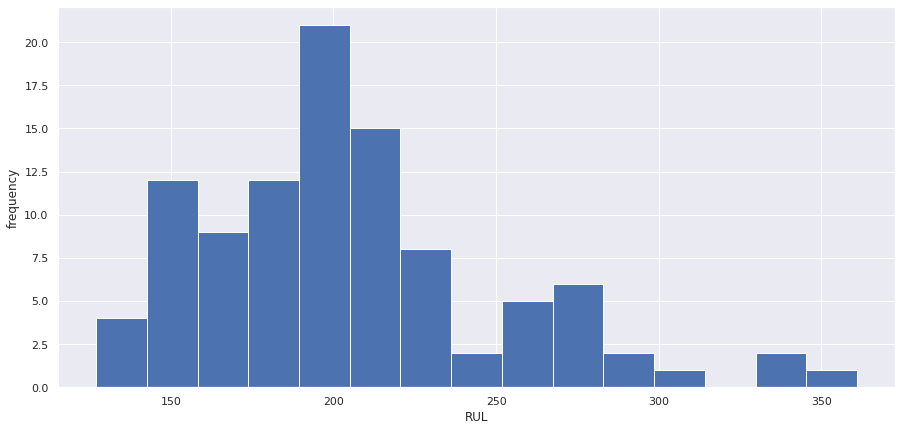

In [ ]:
# distribution of RUL, similar to the 'describe function' of time_cycles above, but visual
df_max_rul = train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

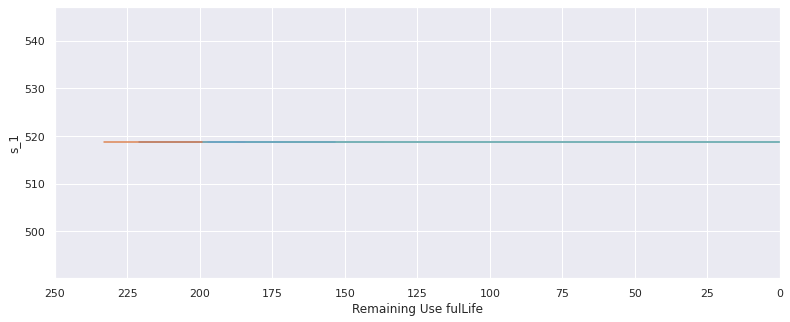

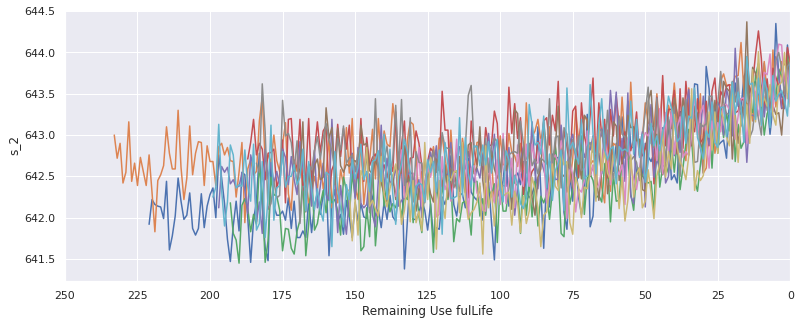

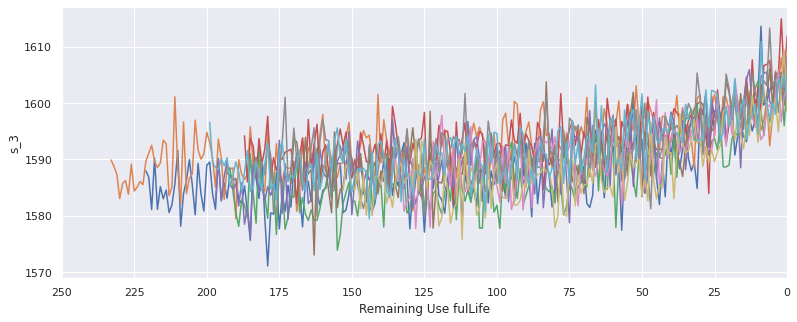

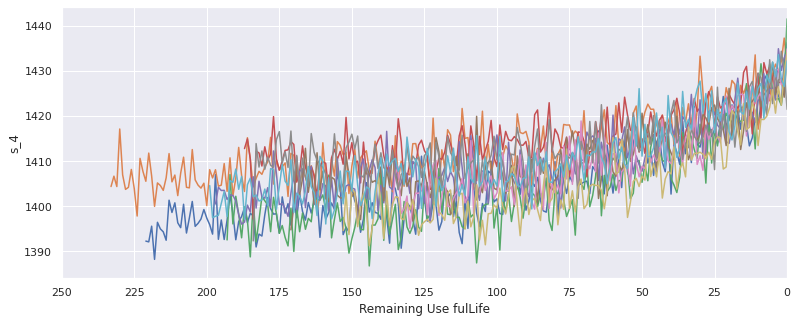

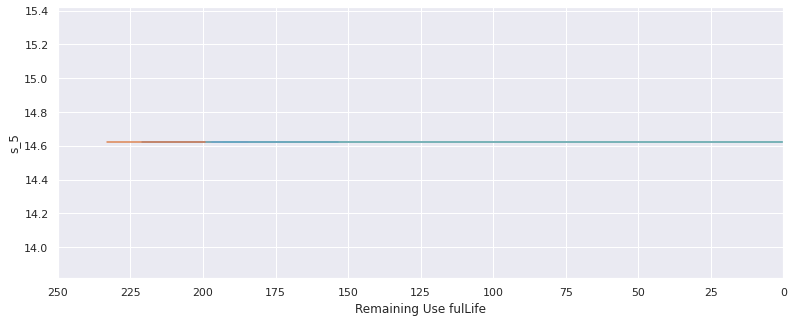

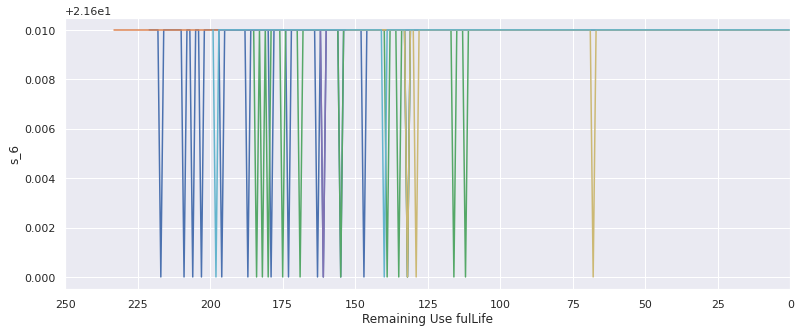

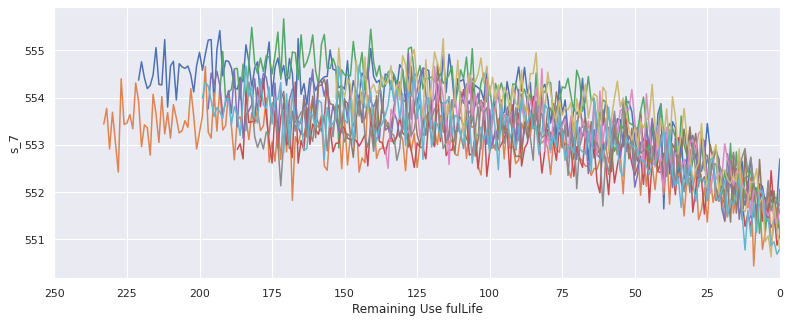

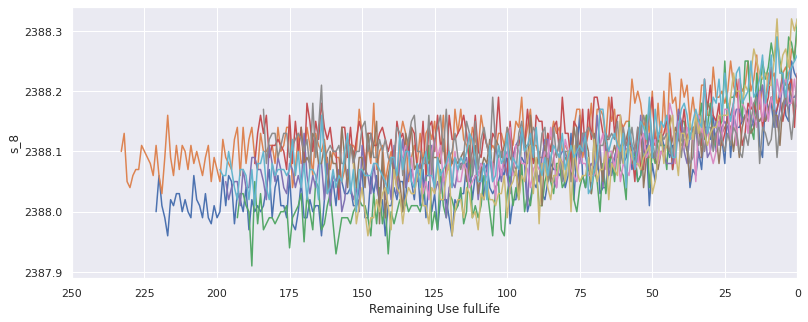

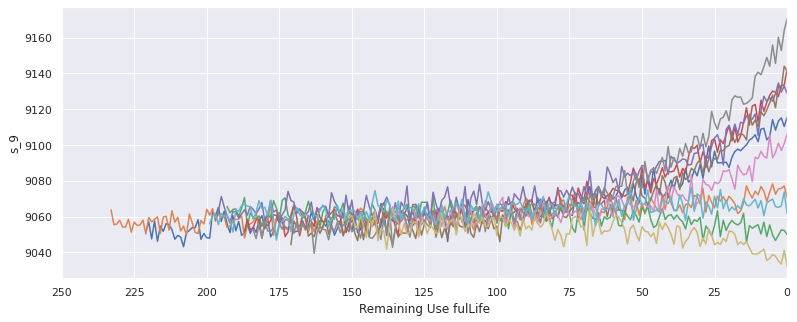

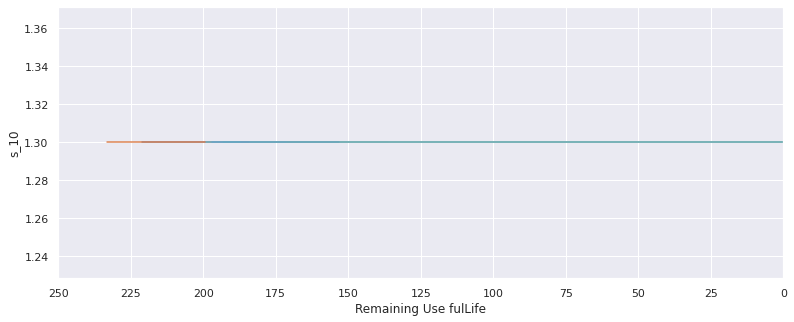

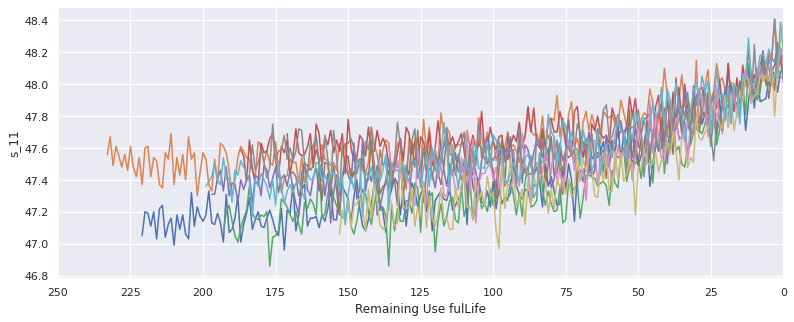

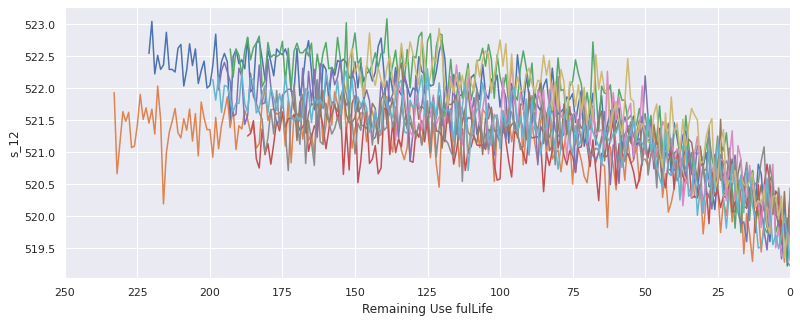

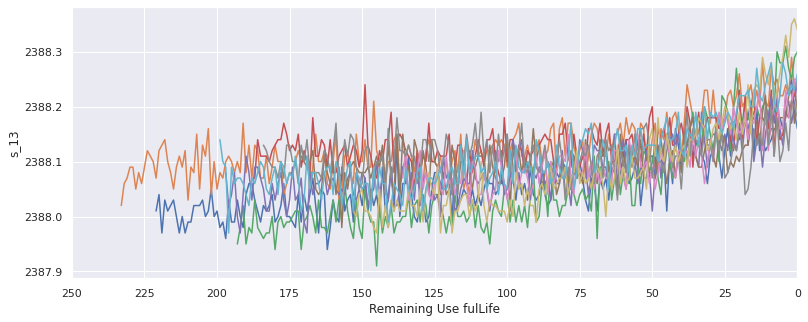

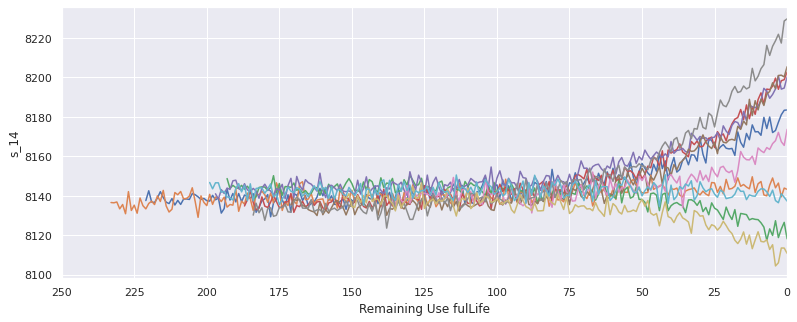

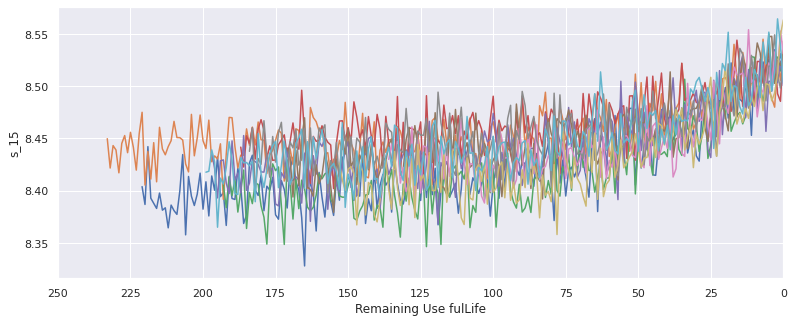

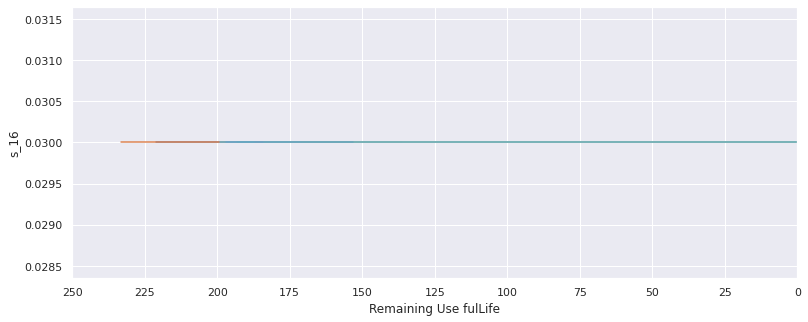

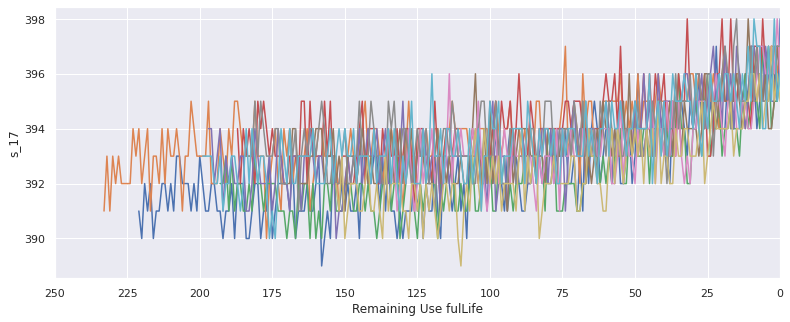

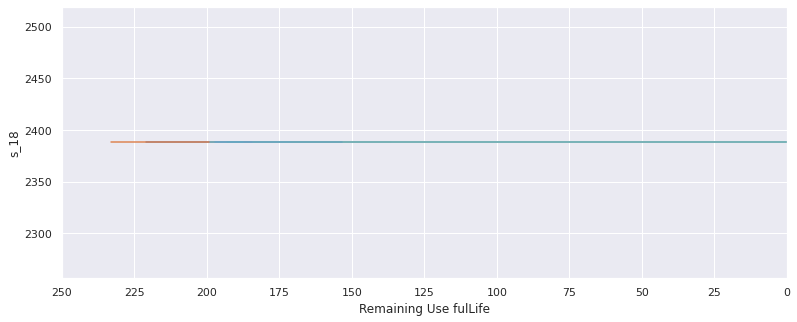

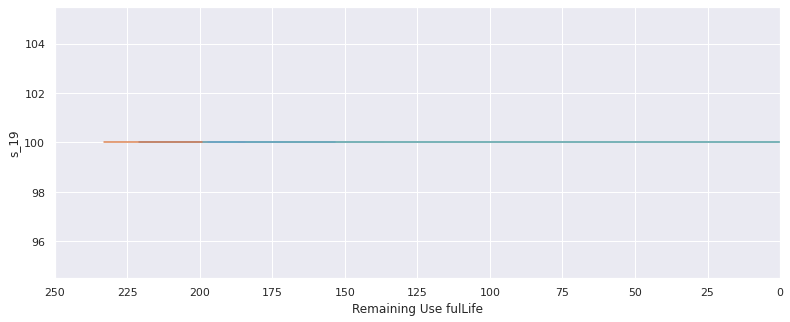

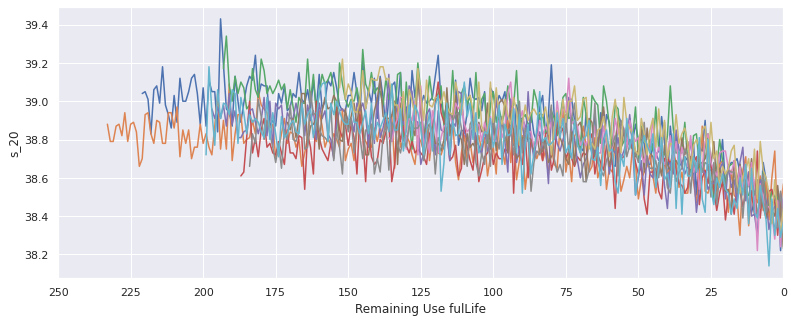

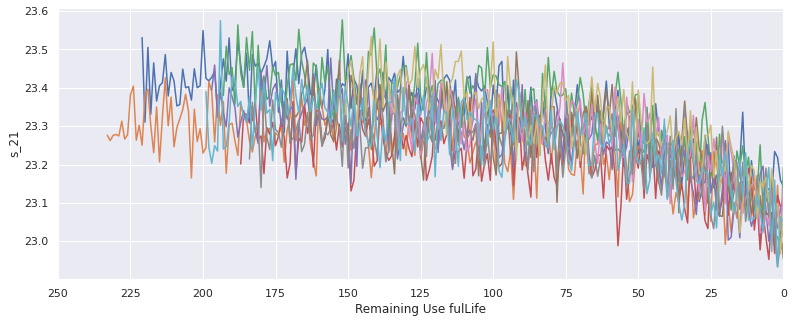

In [ ]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train['unit_nr'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', sensor_name, 
                     data=train[train['unit_nr']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

for sensor_name in sensor_names:
    plot_sensor(sensor_name)

Regrssion model

In [ ]:
# first create an evaluate function
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [ ]:
# drop unwanted columns and split target variable from training set
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']
drop_labels = index_names+setting_names+drop_sensors

X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')

# Since the true RUL values for the test set are only provided for the last time cycle of each enginge, 
# the test set is subsetted to represent the same
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)


print(X_train.columns)  # check remaining columns

Index(['s_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13',
       's_14', 's_15', 's_17', 's_20', 's_21'],
      dtype='object')


In [ ]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:44.66819159545432, R2:0.5794486527796756
test set RMSE:31.952633027739118, R2:0.40877368076584075


RMSE on the test set is lower. This may be explained because the RUL of the training set contains more samples of high RUL compared to the test set and high RUL does not necessarily correlate with the sensor signals. See image below

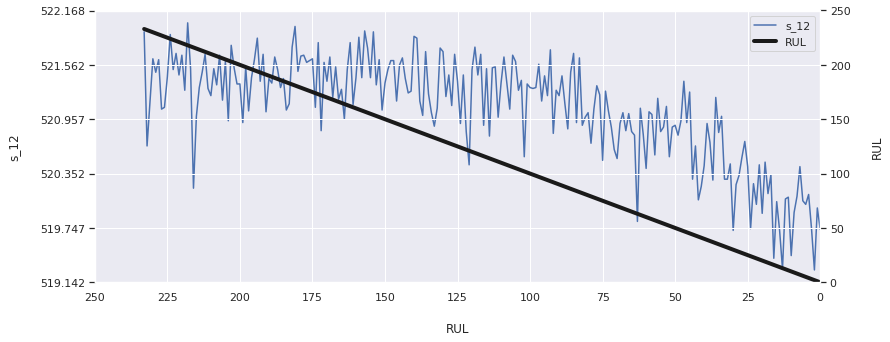

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(13,5))

signal = ax1.plot('RUL', 's_12', 'b',
                 data=train.loc[train['unit_nr']==20])
plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
plt.xticks(np.arange(0, 275, 25))
ax1.set_ylabel('s_12', labelpad=20)
ax1.set_xlabel('RUL', labelpad=20)

ax2 = ax1.twinx()
rul_line = ax2.plot('RUL', 'RUL', 'k', linewidth=4,
                   data=train.loc[train['unit_nr']==20])
ax2.set_ylabel('RUL', labelpad=20)

# code to have equal spacing of y ticks for both axes, so the gridlines allign
# from https://stackoverflow.com/questions/20243683/matplotlib-align-twinx-tick-marks?rq=1
ax2.set_ylim(0, 250)  # set limits of axis you want to display neatly
ax2.set_yticks(
    np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))  # choose integer to neatly divide your axis, in our case 6
ax1.set_yticks(
    np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6))  # apply same spacing to other axis

# code to have a unified legend
# from https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
lines = signal+rul_line
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc=0)


plt.show()

For cycle 250 - 100 (or so) the mean sensor signal is rather stable, while computed RUL is declining.
Below 100 cycles, both the mean sensor signal and computed RUL are declining. In essence, the higher correlation between the sensor signal and computed RUL at lower RUL values makes it easier for the algorithm to produce more accurate predictions.

Next time we'll look at how to leverage this principle to make predictions even more accurate. In addition we'll push to beat our baseline model with a Support Vector Regression as best we can.

we explored the FD001 dataset and created a baseline model to predict the RUL. The baseline had an RMSE of 31.95. In this notebook we'll re-examine our assumption of RUL and fit an SVR to get a better score.

<disclaimer: I aim to showcase the effect of different methods and choices made during model development. These effects are often shown using the test set, something which is considered (very) bad practice but helps for educational purposes.

In [ ]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# define filepath to read data
dir_path = '/content/'

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv((dir_path+'train_FD001.txt'), sep='\s+', header=None, names=col_names)
test = pd.read_csv((dir_path+'test_FD001.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv((dir_path+'RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

train.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [ ]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

train = add_remaining_useful_life(train)
train[index_names+['RUL']].head()

,unit_nr,time_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


**Re-examine RUL**

Our current assumption of RUL for the train set is that it declines linearly to zero. However, when we inspect the sensor signals they often show a 'bend' in their curve indicating degradation has started. Based on the information given to us we can't really say anything about RUL before this point, as we don't have any information on initial wear and tear of the engines.[Heimes 2008]
Therefore, we assume RUL to start out constant and only decline linearly after some time. The aim is to get a similar 'bend' in the curve (see image below).
Starting out with a constant RUL achieves two things:
1) Initially constant RUL correlates better with the stable mean sensor signal
2) Lower peak values of RUL results in lower spread of our target variable, making it easier to fit a line

In [ ]:
clipped_rul = train.loc[train['unit_nr']==20].copy()
clipped_rul['RUL'].clip(upper=125, inplace=True)

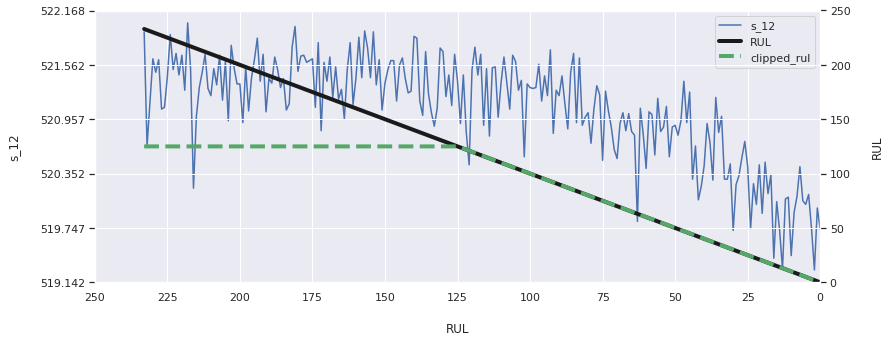

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(13,5))

signal = ax1.plot('RUL', 's_12', 'b',
                 data=train.loc[train['unit_nr']==20])
plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
plt.xticks(np.arange(0, 275, 25))
ax1.set_ylabel('s_12', labelpad=20)
ax1.set_xlabel('RUL', labelpad=20)

ax2 = ax1.twinx()
rul_line = ax2.plot('RUL', 'RUL', 'k', linewidth=4,
                   data=train.loc[train['unit_nr']==20])
rul = train.loc[train['unit_nr']==20, 'RUL']
rul_line2 = ax2.plot(rul, rul.where(rul <= 125, 125), '--g', linewidth=4, label='clipped_rul')  # SET LABEL MANUALLY?
ax2.set_ylabel('RUL', labelpad=20)

# code to have equal spacing of y ticks for both axes, so the gridlines allign
# from https://stackoverflow.com/questions/20243683/matplotlib-align-twinx-tick-marks?rq=1
ax2.set_ylim(0, 250)  # set limits of axis you want to display neatly
ax2.set_yticks(
    np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))  # choose integer to neatly divide your axis, in our case 6
ax1.set_yticks(
    np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6))  # apply same spacing to other axis


# code to have a unified legend
# from https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
lines = signal+rul_line+rul_line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc=0)

plt.show()

In [ ]:
# Let's try this out with our baseline model
# prep data
# drop unwanted columns and split target variable from training set
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']
drop_labels = index_names+setting_names+drop_sensors

X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')

# Since the true RUL values for the test set are only provided for the last time cycle of each enginge, 
# the test set is subsetted to represent the same
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

In [ ]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [ ]:
## Linear declining RUL
# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:44.66819159545432, R2:0.5794486527796756
test set RMSE:31.952633027739118, R2:0.40877368076584075


In [ ]:
y_train_clipped = y_train.clip(upper=125)

In [ ]:
# I previously used the where method, but .clip seems more intuitive
all(y_train.where(y_train <= 125, 125) == y_train_clipped)

True

In [ ]:
## Clipped RUL
# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train_clipped)  

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:21.491018701515067, R2:0.7340432868050533
test set RMSE:21.900213406891613, R2:0.7222608196545963



As we've updated our assumption of RUL, I feel this should also be reflected in the train evaluation. The True RUL of the test set remains untouched.
The train RMSE has more than halved. Of course we've set those targets ourselves, but it still shows how much impact the high 'assumed' RUL values had on overall model performance. Much more imporant tough, is the improvement on the test set (almost one third!). Which informs us the updated assumption is beneficial for modeling true RUL

In [ ]:
# SVM initial regression + clipped RUL
svr = SVR(kernel='linear')
svr.fit(X_train, y_train_clipped)  

# predict and evaluate
y_hat_train = svr.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:29.57783070266026, R2:0.49623314435506494
test set RMSE:29.675150117440094, R2:0.49005151605390174


Results are quite a bit worse, let's try scaling our features to improve model performance

In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()  # for this specific dataset, the type of scaler does not have any effect
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# SVM regression + clipped RUL + scaled
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train_clipped)  

# predict and evaluate
y_hat_train = svr.predict(X_train_scaled)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_scaled)
evaluate(y_test, y_hat_test)

train set RMSE:21.578263975067888, R2:0.7318795396979632
test set RMSE:21.580480163289597, R2:0.730311354095216


Great, the current RMSE is already an improvement over the baseline regression with clipped RUL. Let's see if we can improve it even further with some feature engineering.

In [ ]:
# Feature engineering
from sklearn.preprocessing import PolynomialFeatures
# 2nd degree polynomialFeatures of [a, b] becomes [1, a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2)
X_train_transformed = poly.fit_transform(X_train_scaled)
X_test_transformed = poly.fit_transform(X_test_scaled)

print(X_train_scaled.shape)
print(X_train_transformed.shape)

(20631, 14)
(20631, 120)


In [ ]:
# SVM regression + clipped RUL + engineered features
svr_f = SVR(kernel='linear')
svr_f.fit(X_train_transformed, y_train_clipped)  

# predict and evaluate
y_hat_train = svr_f.predict(X_train_transformed)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr_f.predict(X_test_transformed)
evaluate(y_test, y_hat_test)

train set RMSE:19.716789731130874, R2:0.7761436785704136
test set RMSE:20.585402508370592, R2:0.75460868821153


In [ ]:
# Feature engineering + selection
from sklearn.feature_selection import SelectFromModel
select_features = SelectFromModel(svr_f, threshold='mean', prefit=True)
select_features.get_support()
feature_names = poly.get_feature_names()

print('Original features:\n', X_train.columns)
print('Best features:\n', np.array(feature_names)[select_features.get_support()])
np.array(feature_names)[select_features.get_support()].shape

Original features:
 Index(['s_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13',
       's_14', 's_15', 's_17', 's_20', 's_21'],
      dtype='object')
Best features:
 ['x0' 'x1' 'x2' 'x3' 'x5' 'x6' 'x7' 'x9' 'x10' 'x11' 'x12' 'x13' 'x2 x5'
 'x2 x8' 'x2 x9' 'x3 x5' 'x3 x8' 'x3 x9' 'x4^2' 'x4 x6' 'x4 x7' 'x4 x8'
 'x5^2' 'x5 x6' 'x5 x7' 'x5 x9' 'x5 x12' 'x5 x13' 'x6^2' 'x6 x8' 'x6 x9'
 'x7 x8' 'x7 x9' 'x8^2' 'x9^2' 'x9 x12' 'x9 x13']


(37,)

In [ ]:
# SVM regression + clipped RUL + engineered features + selection
svr = SVR(kernel='linear')
svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped) 

# predict and evaluate
y_hat_train = svr.predict(X_train_transformed[:, select_features.get_support()])
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_transformed[:, select_features.get_support()])
evaluate(y_test, y_hat_test)

train set RMSE:19.746789101481127, R2:0.775461959316527
test set RMSE:20.55613819605483, R2:0.7553058913450649


Our feature space went from 14 to 120, after feature selection we're back down to 37 features. These features improved out model yet again.

In [ ]:
#Simple hyper parameter tuning
epsilon = [0.4, 0.3, 0.2, 0.1, 0.05]

for e in epsilon:
    svr = SVR(kernel='linear', epsilon=e)
    svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)

    # predict and evaluate
    y_hat = svr.predict(X_train_transformed[:, select_features.get_support()])
    mse = mean_squared_error(y_train_clipped, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_train_clipped, y_hat)
    print("epsilon:", e, "RMSE:", rmse, "R2:", variance)

epsilon: 0.4 RMSE: 19.74772556660336 R2: 0.7754406619776462
epsilon: 0.3 RMSE: 19.747580761069848 R2: 0.7754439552496148
epsilon: 0.2 RMSE: 19.74660007817171 R2: 0.7754662580123992
epsilon: 0.1 RMSE: 19.746789101481127 R2: 0.775461959316527
epsilon: 0.05 RMSE: 19.746532456984006 R2: 0.7754677958176168


An epsilon of 0.2 seems best for our current model, let's train it again and evaluate on the test set for our final RMSE

In [ ]:
# Final model
svr = SVR(kernel='linear', epsilon=0.2)
svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)

# predict and evaluate
y_hat_train = svr.predict(X_train_transformed[:, select_features.get_support()])
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_transformed[:, select_features.get_support()])
evaluate(y_test, y_hat_test)

train set RMSE:19.74660007817171, R2:0.7754662580123992
test set RMSE:20.54412482077374, R2:0.7555918150093489


The final SVR has a test RMSE of 20.54. The combination of updating our assumption of RUL and fitting an SVR with tuned boundaries, feature scaling and polynomial features provides a 35.7 % improvement over our baseline model (RMSE = 31.95).

Most of this improvement is attributed to changing our assumption of RUL, which shows the importance of framing your data science problem correctly.

Intro¶
In this notebook we'll develop a distributed lag model to predict the Remaining Useful Life (RUL) of FD001. You can find a full explanation of the code in my accompanying blog post here

<disclaimer: I aim to showcase the effect of different methods and choices made during model development. These effects are often shown using the test set, something which is considered (very) bad practice but helps for educational purposes.>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

Load data and compute RUL¶

In [ ]:

# define filepath to read data
dir_path = './CMAPSSData/'

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv((dir_path+'train_FD001.txt'), sep='\s+', header=None, names=col_names)
test = pd.read_csv((dir_path+'test_FD001.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv((dir_path+'RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

In [ ]:
train.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [ ]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

train = add_remaining_useful_life(train)
train[index_names+['RUL']].head()

,unit_nr,time_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


In [ ]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, Variance:{}'.format(label, rmse, variance))

In [ ]:
# drop unwanted columns based on Exploratory Data Analysis conducted earlier
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']
drop_labels = setting_names+drop_sensors

X_train = train.drop(drop_labels, axis=1)
# y_train = X_train.pop('RUL')  # pop RUL after dropping NaNs introduced by creating lagged variables

X_test_interim = test.drop(drop_labels, axis=1)

Adding lagged variables

In [ ]:

# lagged variables toy example
np.random.seed(42)
toy_df = pd.DataFrame({'value': np.random.rand(5)})
toy_df['value_lag_1'] = toy_df['value'].shift(1)
toy_df['value_lag_2'] = toy_df['value'].shift(2)
display(toy_df)

,value,value_lag_1,value_lag_2
0,0.374540,NaN,NaN
1,0.950714,0.374540,NaN
2,0.731994,0.950714,0.374540
3,0.598658,0.731994,0.950714
4,0.156019,0.598658,0.731994


Notice how row 2 contains the data of t, t-1 and t-2. By adding these lagged variables you can thus represent data of multiple timesteps in a single row. Which can then be used by our model.
Let's try to implement it

In [ ]:
# create lagged variables
remaining_sensors = X_train.columns.difference(index_names+['RUL'])
lag1 = [col + '_lag_1' for col in remaining_sensors]

X_train[lag1] = X_train.groupby('unit_nr')[remaining_sensors].shift(1)
X_train.dropna(inplace=True)

X_test_interim[lag1] = X_test_interim.groupby('unit_nr')[remaining_sensors].shift(1)
X_test_interim.dropna(inplace=True)

In [ ]:
X_train.head()

,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL,s_11_lag_1,s_12_lag_1,s_13_lag_1,s_14_lag_1,s_15_lag_1,s_17_lag_1,s_2_lag_1,s_20_lag_1,s_21_lag_1,s_3_lag_1,s_4_lag_1,s_7_lag_1,s_8_lag_1,s_9_lag_1
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,47.47,521.66,2388.02,8138.62,8.4195,392.0,641.82,39.06,23.4190,1589.70,1400.60,554.36,2388.06,9046.19
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,47.49,522.28,2388.07,8131.49,8.4318,392.0,642.15,39.00,23.4236,1591.82,1403.14,553.75,2388.04,9044.07
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,47.27,522.42,2388.03,8133.23,8.4178,390.0,642.35,38.95,23.3442,1587.99,1404.20,554.26,2388.08,9052.94
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,47.13,522.86,2388.08,8133.83,8.3682,392.0,642.35,38.88,23.3739,1582.79,1401.87,554.45,2388.11,9049.48
5,1,6,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8132.85,8.4108,391,38.98,23.3669,186,47.28,522.19,2388.04,8133.80,8.4294,393.0,642.37,38.90,23.4044,1582.85,1406.22,554.00,2388.06,9055.15


In [ ]:
# target variable
y_train = X_train.pop('RUL')

# prep test data, since the true RUL values for the test set are only provided for the last time cycle
# of each enginge, the test set is subsetted to represent the same
X_test = X_test_interim.groupby('unit_nr').last().reset_index()

In [ ]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:39.367692351135105, Variance:0.6709929595362321
test set RMSE:31.423109839702427, Variance:0.42820706786545804



It works! The evaluation scores are slightly better compared to the linear regression of of our baseline model with an RMSE of 31.95.

Correction: forgot to drop the index names. Without index_names the first added lag does not improve model results, this 'issue' will resolve itself later on by adding even more lags

In [ ]:
X_train.columns

Index(['unit_nr', 'time_cycles', 's_2', 's_3', 's_4', 's_7', 's_8', 's_9',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21',
       's_11_lag_1', 's_12_lag_1', 's_13_lag_1', 's_14_lag_1', 's_15_lag_1',
       's_17_lag_1', 's_2_lag_1', 's_20_lag_1', 's_21_lag_1', 's_3_lag_1',
       's_4_lag_1', 's_7_lag_1', 's_8_lag_1', 's_9_lag_1'],
      dtype='object')

In [ ]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train.drop(index_names, axis=1), y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train.drop(index_names, axis=1))
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test.drop(index_names, axis=1))
evaluate(y_test, y_hat_test)

train set RMSE:44.07622990747624, Variance:0.5875852828949177
test set RMSE:32.63716634858819, Variance:0.38317020158012083


In [ ]:
# Now lets create a function for adding multiple laggs
def add_lagged_variables(df_input, nr_of_lags, columns):
    df = df_input.copy()
    for i in range(nr_of_lags):
        lagged_columns = [col + '_lag_{}'.format(i+1) for col in columns]
        df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i+1)
    df.dropna(inplace=True)
    return df

In [ ]:

def add_specific_lags(df_input, list_of_lags, columns):
    df = df_input.copy()
    for i in list_of_lags:
        lagged_columns = [col + '_lag_{}'.format(i) for col in columns]
        df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i)
    df.dropna(inplace=True)
    return df


Stationarity
Stationarity implies the statistical properties of the time series, such as mean and variance do not change over time, in addition the covariance (spread of the time series) should not be dependent on time (see figure below).
It is important that these statistical properties stay constant because a lot of statistical models rely on these properties for their predictions. Hence, if the mean, variance or covariance changes with time the model would not be able to accurately predict the next value [1]

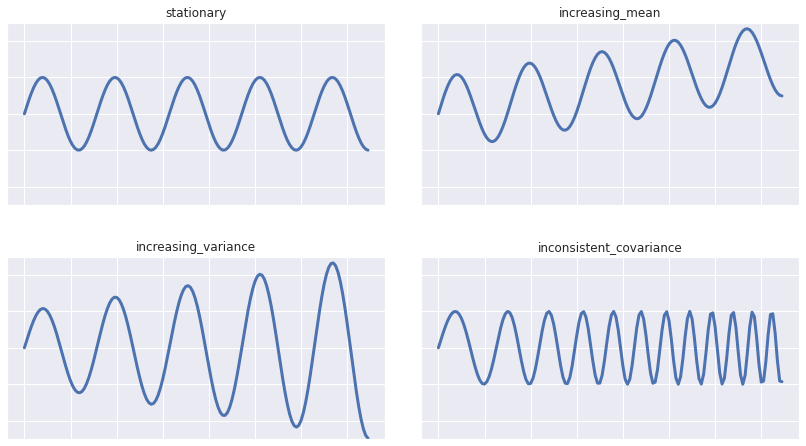

In [ ]:
# stationarity graphs
t = np.arange(0,150)
factor = 0.2
stationary = np.sin(factor*t)
increasing_mean = np.sin(factor*t) + t/100
increasing_variance = np.sin(factor*t) * (1 + t/100)
inconsistent_covariance = np.sin((factor + t/500) * t)

plotlist = [stationary, increasing_mean, increasing_variance, inconsistent_covariance]
plotnames = ['stationary', 'increasing_mean', 'increasing_variance', 'inconsistent_covariance']  # not very elegant but gets the job done

plt.subplots(2, 2, figsize=(12,7))  # initiate subplot figure
ylim = 2.5

for i in range(len(plotlist)):

    plt.subplot(2, 2, i+1)  # define which subplot to fill, range starts at 0 so increment with 1
    plt.plot(t, plotlist[i], linewidth=3)
    plt.ylim(-ylim, ylim)
    plt.tick_params(which='both', bottom=False, labelbottom=False, left=False, labelleft=False)  # remove axis ticks and labels
    plt.title(str(plotnames[i]))

plt.tight_layout(pad=3)  # specify layout and whitespace padding between graphs
plt.show()
# plt.close()

In [ ]:
# test stationarity using adfuller test
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, n_obs, critical_values, icbest = adfuller(train[ 's_7'], maxlag=1)
print('all units, single column test results')
print('adf: {} \npvalue: {}'.format(adf, pvalue))
print('Significant: {}'.format(pvalue < 0.05))
print('NOTE: Testing one column has values of 100 engines, all engines together are stationary, but single engines are not!\n')

test_series = train.loc[train['unit_nr']==1, 's_7']
adf, pvalue, usedlag, n_obs, critical_values, icbest = adfuller(test_series, maxlag=1)
print('single unit, single column test results')
print('adf: {} \npvalue: {}'.format(adf, pvalue))
print('Significant: {}\n'.format(pvalue < 0.05))

test_series = test_series.diff(1).dropna()
adf, pvalue, usedlag, n_obs, critical_values, icbest = adfuller(test_series, maxlag=1)
print('single unit, single column test results after differencing')
print('adf: {} \npvalue: {}'.format(adf, pvalue))
print('Significant: {}\n'.format(pvalue < 0.05))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


all units, single column test results
adf: -32.41316418932904 
pvalue: 0.0
Significant: True
NOTE: Testing one column has values of 100 engines, all engines together are stationary, but single engines are not!

single unit, single column test results
adf: -2.276666927948115 
pvalue: 0.17960380425355355
Significant: False

single unit, single column test results after differencing
adf: -14.824168539718967 
pvalue: 1.9431018596392618e-27
Significant: True



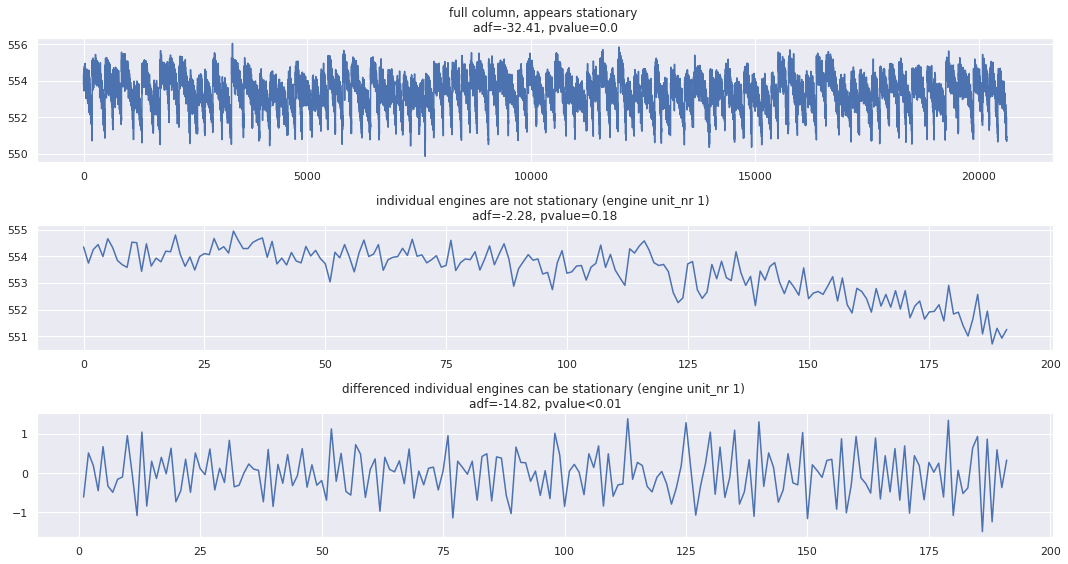

In [ ]:
# full column vs single unit
plt.subplots(3,1, figsize=(15,8))

plt.subplot(3,1,1)
plt.plot(train[ 's_7'])
plt.title('full column, appears stationary \n\
adf=-32.41, pvalue=0.0')


plt.subplot(3,1,2)
plt.plot(train.loc[train['unit_nr']==1, 's_7'])
plt.title('individual engines are not stationary (engine unit_nr 1) \n\
adf=-2.28, pvalue=0.18')


plt.subplot(3,1,3)
plt.plot(train.loc[train['unit_nr']==1, 's_7'].diff(1).dropna())
plt.title('differenced individual engines can be stationary (engine unit_nr 1) \n\
adf=-14.82, pvalue<0.01')


plt.tight_layout()
plt.show()
# plt.close()

In [ ]:
# test code to find the maximum times a time series needs to be differenced
unit = train.loc[train['unit_nr']==1].drop(drop_labels + ['unit_nr', 'time_cycles', 'RUL'], axis=1) # subset to unit nr 1 and sensors of interest.
for col in unit.columns:
    maxdiff = 0
    do = True
    adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(unit[col], maxlag=1)
    if pvalue < 0.05:
        do = False
    
    while do:
        maxdiff += 1
        adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(unit[col].diff(maxdiff).dropna(), maxlag=1)
        if pvalue < 0.05:  # if significant, stop differencing and testing for stationarity
            do = False
 
    print("{}: pvalue = {}, maxdiff = {}".format(col, pvalue, maxdiff))

s_2: pvalue = 0.002459586564458295, maxdiff = 0
s_3: pvalue = 1.0520451518288789e-05, maxdiff = 0
s_4: pvalue = 4.60900610486878e-30, maxdiff = 1
s_7: pvalue = 1.9431018596392618e-27, maxdiff = 1
s_8: pvalue = 3.532206691038888e-30, maxdiff = 1
s_9: pvalue = 1.568110857345953e-09, maxdiff = 0
s_11: pvalue = 8.864663797423208e-30, maxdiff = 1
s_12: pvalue = 3.5925713229506605e-29, maxdiff = 1
s_13: pvalue = 2.4063159325209048e-29, maxdiff = 1
s_14: pvalue = 0.0, maxdiff = 1
s_15: pvalue = 0.01424632892460834, maxdiff = 0
s_17: pvalue = 0.0016961883459597797, maxdiff = 0
s_20: pvalue = 0.002218980849287948, maxdiff = 0
s_21: pvalue = 0.03564593079106073, maxdiff = 0


In [ ]:
# wrap the code to find the max difference in a function and create a function to make the time-series stationary
def find_max_diff(series):
    maxdiff = 0
    do = True
    adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(series, maxlag=1)
    if pvalue < 0.05:
        do = False
    
    while do:
        maxdiff += 1
        adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(series.diff(maxdiff).dropna(), maxlag=1)
        if pvalue < 0.05:  # if significant, stop differencing and testing for stationarity
            do = False
    return maxdiff


def make_stationary(df_input, columns):
    df = df_input.copy()
    for unit_nr in range(1, df['unit_nr'].max()+1):
        for col in columns:
            maxdiff = find_max_diff(df.loc[df['unit_nr']==unit_nr, col])
            if maxdiff > 0:
                df.loc[df['unit_nr']==unit_nr, col] = df.loc[df['unit_nr']==unit_nr, col].diff(maxdiff)
    df.dropna(inplace=True)
    return df

In [ ]:
# Apply what we have untill now

# make all remaining sensors stationary per unit_nr
intermediate_df = train.drop(drop_labels, axis=1)
intermediate_df = make_stationary(intermediate_df, remaining_sensors)

In [ ]:
intermediate_df.head()  # stationary data!

,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL
1,1,2,642.15,1591.82,2.54,-0.61,-0.02,9044.07,0.02,0.62,0.05,-7.13,8.4318,392.0,39.00,23.4236,190
2,1,3,642.35,1587.99,1.06,0.51,0.04,9052.94,-0.22,0.14,-0.04,1.74,8.4178,390.0,38.95,23.3442,189
3,1,4,642.35,1582.79,-2.33,0.19,0.03,9049.48,-0.14,0.44,0.05,0.60,8.3682,392.0,38.88,23.3739,188
4,1,5,642.37,1582.85,4.35,-0.45,-0.05,9055.15,0.15,-0.67,-0.04,-0.03,8.4294,393.0,38.90,23.4044,187
5,1,6,642.10,1584.47,-7.85,0.67,-0.04,9049.68,-0.12,-0.51,-0.01,-0.95,8.4108,391.0,38.98,23.3669,186


In [ ]:
# create and fit model
lm = LinearRegression()
lm.fit(intermediate_df[remaining_sensors], intermediate_df['RUL'])

# predict and evaluate
y_hat_train = lm.predict(intermediate_df[remaining_sensors])
evaluate(intermediate_df['RUL'], y_hat_train, 'train')

train set RMSE:51.63375613791181, Variance:0.4340864011385228


Training RMSE has become quite a bit worse as a result of making the data stationary. This can be explained by the data no longer having a trend, making it difficult to fit a regression line. Scores will improve again when adding lagged variables, as this will inform the model of the change of the sensor values over time

# **AIC: searching for the correct number of lags**

In [ ]:

# add lags and evaluate models to find optimal lag length
import statsmodels.api as sm

metrics = pd.DataFrame(columns=['rmse', 'AIC', 'BIC'])
nr_of_lags = 30
for i in range(0, nr_of_lags+1):
    X_train = add_lagged_variables(intermediate_df, i, remaining_sensors)
    X_train = X_train.drop(index_names, axis=1)
    y_train = X_train.pop('RUL')
    
    model = sm.OLS(y_train, sm.add_constant(X_train.values))
    result = model.fit()

    metrics = metrics.append(pd.DataFrame(data=[[np.sqrt(result.mse_resid), round(result.aic,2), round(result.bic,2)]],
                               columns=['rmse', 'AIC', 'BIC']),
                               ignore_index = True)

display(metrics)

,rmse,AIC,BIC
0,51.652627,220271.65,220390.59
1,46.060503,214530.30,214760.12
2,43.058562,210753.82,211094.38
3,41.151503,207898.35,208349.51
4,39.833453,205574.27,206135.89
5,38.813294,203528.00,204199.94
6,37.986450,201667.95,202450.06
7,37.304649,199952.23,200844.37
8,36.723366,198338.72,199340.76
9,36.198014,196782.37,197894.15



Based on the table of the metrics it does not become clear how many lags to add as the metrics seem to keep improving.
Let's try plotting a metric for any visual ques

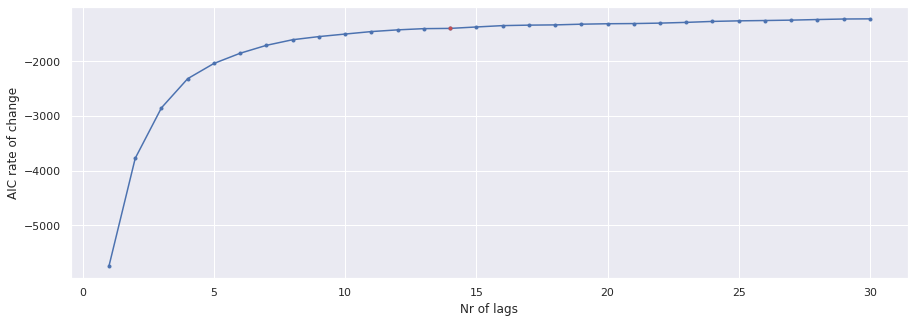

In [ ]:

plt.figure(figsize=(15,5))
plt.plot(metrics['AIC'].diff(), marker='.')  # plot the difference to see where it flattens out
plt.plot(14, metrics['AIC'].diff()[14], '.r')
plt.xlabel("Nr of lags")
plt.ylabel("AIC rate of change")
plt.show()
plt.close()


Based on the graph I'd say improvement stagnates at 13-14 lags.
One problem with adding multiple lags of the same variable is multicolinearity, let's check that next.

In [ ]:
result.summary()  # Check warnings and condition number at the bottom of output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RUL   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     136.9
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        06:44:06   Log-Likelihood:                -83949.
No. Observations:               17533   AIC:                         1.688e+05
Df Residuals:                   17098   BIC:                         1.721e+05
Df Model:                         434                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.908e+04    165.898    114.981      0.000    1.88e+04    1.94e+04
x1            -0.5162      0.722     -0.715      0.474      -1.931       0.899
x2            -0.3837      0.055     -6.974      0.000      -0.492      -0.276
x3            -0.2225      0.047     -4.728      0.000      -0.315      -0.130
x4             1.2576      0.471      2.671      0.008       0.335       2.180
x5            14.4389      6.395      2.258      0.024       1.904      26.974
x6            -0.0607      0.046     -1.325      0.185      -0.150       0.029
x7            -7.1442      1.865     -3.830      0.000     -10.800      -3.488
x8             1.5610      0.624      2.501      0.012       0.338       2.784
x9            12.0334      6.284      1.915      0.056      -0.284      24.351
x10            0.0454      0.059      0.764      0.445      -0.071       0.162
x11          -32.1409     10.207     -3.149      0.002     -52.148     -12.134
x12           -0.4505      0.228     -1.975      0.048      -0.897      -0.003
x13            3.2219      2.087      1.544      0.123      -0.869       7.313
x14            5.7930      3.539      1.637      0.102      -1.144      12.730
x15          -11.3690      2.129     -5.341      0.000     -15.541      -7.197
x16            2.2548      0.675      3.342      0.001       0.932       3.577
x17           13.9514      6.514      2.142      0.032       1.183      26.720
x18            0.0655      0.063      1.035      0.301      -0.059       0.190
x19          -31.2511     10.278     -3.041      0.002     -51.397     -11.106
x20           -0.4099      0.228     -1.797      0.072      -0.857       0.037
x21           -0.5227      0.723     -0.723      0.470      -1.939       0.894
x22            3.5827      2.090      1.714      0.087      -0.515       7.680
x23            5.4823      3.544      1.547      0.122      -1.464      12.429
x24           -0.3639      0.055     -6.605      0.000      -0.472      -0.256
x25           -0.3235      0.051     -6.390      0.000      -0.423      -0.224
x26            1.6130      0.494      3.263      0.001       0.644       2.582
x27           16.1230      6.638      2.429      0.015       3.112      29.134
x28           -0.0789      0.048     -1.633      0.103      -0.174       0.016
x29          -13.5609      2.187     -6.200      0.000     -17.848      -9.273
x30            2.6131      0.679      3.850      0.000       1.283       3.943
x31           12.4625      6.550      1.903      0.057      -0.377      25.302
x32            0.0639      0.064      1.003      0.316      -0.061       0.189
x33          -27.0154     10.276     -2.629      0.009     -47.157      -6.874
x34           -0.3297      0.228     -1.443      0.149      -0.777       0.118
x35           -0.8074      0.724     -1.116      0.264      -2.226       0.611
x3

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.

# **Multicolinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X_train = add_lagged_variables(intermediate_df, 14, remaining_sensors)
X_train = X_train.drop(index_names, axis=1)

# note, this takes a few minutes to calculate
vifs = {X_train.columns[i]:round(vif(X_train.values, i), 2) for i in range(len(X_train.columns))}
display(vifs)

# huge colinearity problems, most vif values are far bigger than 5
# (https://www.statisticshowto.datasciencecentral.com/variance-inflation-factor/)

{'RUL': 5.11,
 's_11': 28779.21,
 's_11_lag_1': 36657.17,
 's_11_lag_10': 35884.42,
 's_11_lag_11': 36892.92,
 's_11_lag_12': 37626.5,
 's_11_lag_13': 36642.27,
 's_11_lag_14': 28840.05,
 's_11_lag_2': 37805.01,
 's_11_lag_3': 37105.7,
 's_11_lag_4': 36059.48,
 's_11_lag_5': 35244.87,
 's_11_lag_6': 34798.69,
 's_11_lag_7': 34504.61,
 's_11_lag_8': 34722.55,
 's_11_lag_9': 35139.75,
 's_12': 686940.38,
 's_12_lag_1': 785930.67,
 's_12_lag_10': 770020.38,
 's_12_lag_11': 773025.62,
 's_12_lag_12': 782627.0,
 's_12_lag_13': 786005.95,
 's_12_lag_14': 687369.03,
 's_12_lag_2': 780833.03,
 's_12_lag_3': 773526.33,
 's_12_lag_4': 771185.41,
 's_12_lag_5': 772466.32,
 's_12_lag_6': 774980.99,
 's_12_lag_7': 774738.12,
 's_12_lag_8': 773448.24,
 's_12_lag_9': 769744.07,
 's_13': 2480791096.44,
 's_13_lag_1': 2613853860.37,
 's_13_lag_10': 2630826238.38,
 's_13_lag_11': 2608847308.54,
 's_13_lag_12': 2615374839.28,
 's_13_lag_13': 2642486873.59,
 's_13_lag_14': 2525867132.5,
 's_13_lag_2': 262

Some googling led me to this post: https://stats.stackexchange.com/questions/332428/regression-model-constant-causes-multicollinearity-warning-but-not-in-standardi
Let's try and implement scaling to fix our multicolinearity problems.

In [ ]:
# add scaling to hopefully prevent high multicolinearity
from sklearn.preprocessing import StandardScaler

intermediate_df = train.drop(drop_labels, axis=1)
scaler = StandardScaler()
scaler.fit(intermediate_df[remaining_sensors])
intermediate_df[remaining_sensors] = scaler.transform(intermediate_df[remaining_sensors])

intermediate_df = make_stationary(intermediate_df, remaining_sensors)

X_train = add_lagged_variables(intermediate_df, 14, remaining_sensors)
X_train = X_train.drop(index_names, axis=1)

vifs = {X_train.columns[i]:round(vif(X_train.values, i), 2) for i in range(len(X_train.columns))}
display(vifs)


{'RUL': 2.34,
 's_11': 1.9,
 's_11_lag_1': 2.39,
 's_11_lag_10': 2.29,
 's_11_lag_11': 2.34,
 's_11_lag_12': 2.36,
 's_11_lag_13': 2.25,
 's_11_lag_14': 1.73,
 's_11_lag_2': 2.42,
 's_11_lag_3': 2.35,
 's_11_lag_4': 2.28,
 's_11_lag_5': 2.23,
 's_11_lag_6': 2.2,
 's_11_lag_7': 2.19,
 's_11_lag_8': 2.21,
 's_11_lag_9': 2.24,
 's_12': 1.97,
 's_12_lag_1': 2.22,
 's_12_lag_10': 2.04,
 's_12_lag_11': 2.03,
 's_12_lag_12': 2.04,
 's_12_lag_13': 2.02,
 's_12_lag_14': 1.73,
 's_12_lag_2': 2.18,
 's_12_lag_3': 2.13,
 's_12_lag_4': 2.11,
 's_12_lag_5': 2.1,
 's_12_lag_6': 2.09,
 's_12_lag_7': 2.08,
 's_12_lag_8': 2.07,
 's_12_lag_9': 2.05,
 's_13': 2.37,
 's_13_lag_1': 2.47,
 's_13_lag_10': 2.33,
 's_13_lag_11': 2.3,
 's_13_lag_12': 2.29,
 's_13_lag_13': 2.29,
 's_13_lag_14': 2.15,
 's_13_lag_2': 2.45,
 's_13_lag_3': 2.42,
 's_13_lag_4': 2.41,
 's_13_lag_5': 2.41,
 's_13_lag_6': 2.4,
 's_13_lag_7': 2.4,
 's_13_lag_8': 2.38,
 's_13_lag_9': 2.35,
 's_14': 4.75,
 's_14_lag_1': 5.27,
 's_14_lag_10'

# **Combine, predict and evaluate**

In [ ]:
# first let's re-examine the optimal amount of lags as we did before
# execute data processing steps to make sure we're working with the correctly processed data
intermediate_df = train.drop(drop_labels, axis=1)
scaler = StandardScaler()
scaler.fit(intermediate_df[remaining_sensors])
intermediate_df[remaining_sensors] = scaler.transform(intermediate_df[remaining_sensors])

intermediate_df = make_stationary(intermediate_df, remaining_sensors)

# calculate metrics
metrics = pd.DataFrame(columns=['rmse', 'AIC', 'BIC'])
nr_of_lags = 30
for i in range(0, nr_of_lags+1):
    X_train = add_lagged_variables(intermediate_df, i, remaining_sensors)
    X_train = X_train.drop(index_names, axis=1)
    y_train = X_train.pop('RUL')
    
    model = sm.OLS(y_train, sm.add_constant(X_train.values))
    result = model.fit()

    metrics = metrics.append(pd.DataFrame(data=[[np.sqrt(result.mse_resid), round(result.aic,2), round(result.bic,2)]],
                               columns=['rmse', 'AIC', 'BIC']),
                               ignore_index = True)

display(metrics)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(metrics['AIC'].diff(), marker='.')  # plot the difference to see where it flattens out
plt.plot(9, metrics['AIC'].diff()[9], '.r')
plt.xlabel("Nr of lags")
plt.ylabel("AIC rate of change")
plt.show()
plt.close()

The point shifted a little, improvement stagnates at 9 lags instead of 14.

In [ ]:
# train and evaluate model with 0 to n lags
lags = 9

# prep data
X_train_interim = train.drop(drop_labels, axis=1)
X_train_interim[remaining_sensors] = scaler.transform(X_train_interim[remaining_sensors])
X_train_interim = make_stationary(X_train_interim, remaining_sensors)
X_train_interim = add_lagged_variables(X_train_interim, lags, remaining_sensors)
X_train_interim = sm.add_constant(X_train_interim)
X_train = X_train_interim.drop(index_names, axis=1)
y_train = X_train.pop("RUL")

X_test_interim = test.drop(drop_labels, axis=1)
X_test_interim[remaining_sensors] = scaler.transform(X_test_interim[remaining_sensors])
X_test_interim = make_stationary(X_test_interim, remaining_sensors)
X_test_interim = add_lagged_variables(X_test_interim, lags, remaining_sensors)
X_test_interim = X_test_interim.groupby('unit_nr').last().reset_index()
X_test_interim = sm.add_constant(X_test_interim)
X_test = X_test_interim.drop(index_names, axis=1)

# fit model
model = sm.OLS(y_train.clip(upper=125), X_train)  # apply clipped RUL from last post
model_fitted = model.fit()

# predict
y_hat_train = model_fitted.predict(X_train)
y_hat = model_fitted.predict(X_test)

# evaluate
evaluate(y_train.clip(upper=125), y_hat_train, 'train')
evaluate(y_test, y_hat)

In [ ]:
# train and evaluate model with specific lags
specific_lags = [1,2,3,4,5,10,20]

# prep data
X_train_interim = train.drop(drop_labels, axis=1)
X_train_interim[remaining_sensors] = scaler.transform(X_train_interim[remaining_sensors])
X_train_interim = make_stationary(X_train_interim, remaining_sensors)
X_train_interim = add_specific_lags(X_train_interim, specific_lags, remaining_sensors)
X_train_interim = sm.add_constant(X_train_interim)
X_train = X_train_interim.drop(index_names, axis=1)
y_train = X_train.pop("RUL")

X_test_interim = test.drop(drop_labels, axis=1)
X_test_interim[remaining_sensors] = scaler.transform(X_test_interim[remaining_sensors])
X_test_interim = make_stationary(X_test_interim, remaining_sensors)
X_test_interim = add_specific_lags(X_test_interim, specific_lags, remaining_sensors)
X_test_interim = X_test_interim.groupby('unit_nr').last().reset_index()
X_test_interim = sm.add_constant(X_test_interim)
X_test = X_test_interim.drop(index_names, axis=1)

# fit model
model = sm.OLS(y_train.clip(upper=125), X_train)
model_fitted = model.fit()

# predict
y_hat_train = model_fitted.predict(X_train)
y_hat = model_fitted.predict(X_test)

# evaluate
evaluate(y_train.clip(upper=125), y_hat_train, 'train')
evaluate(y_test, y_hat)

# **Results**
specific lags and test rmse
rmse = 21.7642, lags = [1,2,3,4,5]
rmse = 21.1489, lags = [1,2,3,4,5,6,7,8,9]
rmse = 21.0690, lags = [1,2,3,4,5,10,20,30]
rmse = 20.8522, lags = [1,2,3,4,5,10,20]

There are of course many more possibilities, but with minimal testing and taking into account the stagnating improvement from adding more continuous lags, lags [1,2,3,4,5,10,20] performed best with an rmse of 20.8522.
These results come pretty close to our SVR from last time (RMSE = 20.54). The distributed lag model is a valuable addition to the possible solutions, giving great flexibility and control during model development while also being easy to explain and interpret by the business.


## sources used:

# [1] https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3

# choosing the correct nr of lags
# https://stats.stackexchange.com/questions/226468/how-many-lags-should-i-include-in-time-series-prediction
# https://www.researchgate.net/post/How_do_you_choose_the_optimal_laglength_in_a_time_series

# distributed lag models
# https://stats.stackexchange.com/questions/189317/does-using-lagged-independent-variables-makes-sense
# https://www.reed.edu/economics/parker/312/tschapters/S13_Ch_3.pdf

# VAR
# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

# unit root (stationarity)
# https://www.quora.com/What-is-unit-root-in-a-time-series
# https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test
# https://www.quora.com/What-is-the-purpose-of-differencing-in-time-series-models

# multicolinearity and vif
# https://www.statisticshowto.datasciencecentral.com/variance-inflation-factor/
# https://stats.stackexchange.com/questions/332428/regression-model-constant-causes-multicollinearity-warning-but-not-in-standardi


# other posts
# http://people.duke.edu/~rnau/411l696.htm
# http://people.duke.edu/~rnau/timereg.html
# https://www.ethanrosenthal.com/2018/03/22/time-series-for-scikit-learn-people-part2/
# https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3
# https://towardsdatascience.com/almost-everything-you-need-to-know-about-time-series-860241bdc578
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/
# https://stats.stackexchange.com/questions/94723/using-non-stationary-time-series-data-in-ols-regression


# **Survival Analysis using lifelines**

**Intro**
In this notebook we'll develop a Survival Regression model on the FD001 dataset for predictive maintenance. As the results of the chosen Survival model does not directly inform us of the Remaining Useful Life (RUL) of the engines, we fit a second model to get an indication of RUL. You can find a full explanation of the code in my accompanying blog post here

<disclaimer: I aim to showcase the effect of different methods and choices made during model development. These effects are often shown using the test set, something which is considered (very) bad practice but helps for educational purposes.>

In [ ]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.metrics import mean_squared_error, r2_score
!pip install lifelines
from lifelines import KaplanMeierFitter, CoxTimeVaryingFitter

     |████████████████████████████████| 348 kB 14.8 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=f6c81064ec65af1c2c840b3e120ad723c9904ca2ab441be089abb1c0777fffbe
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [ ]:
# define filepaths to read data
dir_path = '/content/'
train_file = 'train_FD001.txt'
test_file = 'test_FD001.txt'

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv((dir_path+train_file), sep='\s+', header=None, 
                 names=col_names)
X_test = pd.read_csv((dir_path+test_file), sep='\s+', header=None, 
                 names=col_names)
y_test = pd.read_csv((dir_path+'RUL_FD001.txt'), sep='\s+', header=None, 
                 names=['RemainingUsefulLife'])

In [ ]:
train.head()

,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL,breakdown,start,hazard
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,125,0,0,-6.473092
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,125,0,1,-5.480498
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,125,0,2,-7.154796
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,125,0,3,-8.267140
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,125,0,4,-5.401533


In [ ]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

train = add_remaining_useful_life(train)  # add computed RUL for later use
display(train[index_names+['RUL']].head())

,unit_nr,time_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


In [ ]:
train['RUL'].clip(upper=125, inplace=True)  # clip RUL as discussed in SVR and problem framing analysis

drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']  # non-informative features, derived from EDA
drop_labels = setting_names + drop_sensors
train.drop(labels=drop_labels, axis=1, inplace=True)

In [ ]:
print(train.columns)
remaining_sensors = ['s_2', 's_3', 's_4', 's_7', 's_8', 's_9',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']

Index(['unit_nr', 'time_cycles', 's_2', 's_3', 's_4', 's_7', 's_8', 's_9',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21', 'RUL'],
      dtype='object')


**Data preparation**

The CoxTimeVaryingFitter we'll use later requires a breakdown column.
let's add that column indicating if the engines broke down (1) or are still functioning (0)

In [ ]:
train['breakdown'] = 0
idx_last_record = train.reset_index().groupby(by='unit_nr')['index'].last()  # engines breakdown at the last cycle
train.at[idx_last_record, 'breakdown'] = 1

Next, CoxTimeVarying fitter requires an observation start and stop column.
The time_cycles column will indicate the end of an observation and time_cycles -1 the start of an observation

In [ ]:
train['start'] = train['time_cycles'] - 1
train.tail() # check results

,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL,breakdown,start
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4,0,195
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3,0,196
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2,0,197
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1,0,198
20630,100,200,643.85,1600.38,1432.14,550.79,2388.26,9061.48,48.20,519.30,2388.26,8137.33,8.5036,396,38.37,23.0522,0,1,199


**Introduce right sensoring in training set**

Since the engines in the training set are all run to failure, we artificially introduce right censoring to allow playing with the data in a bit more realistic setting.

In [ ]:
cut_off = 200
train_censored = train[train['time_cycles'] <= cut_off].copy()

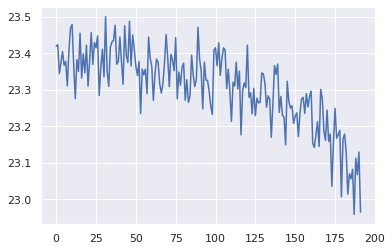

In [ ]:
plt.plot(train_censored[train_censored['unit_nr']==1].s_21)
# plt.plot(train_censored[train_censored['unit_nr']==1].RUL)
plt.show()

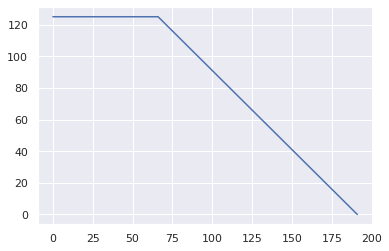

In [ ]:
# plt.plot(train_censored[train_censored['unit_nr']==1].s_21)
plt.plot(train_censored[train_censored['unit_nr']==1].RUL)
plt.show()

# **KaplanMeier curve**

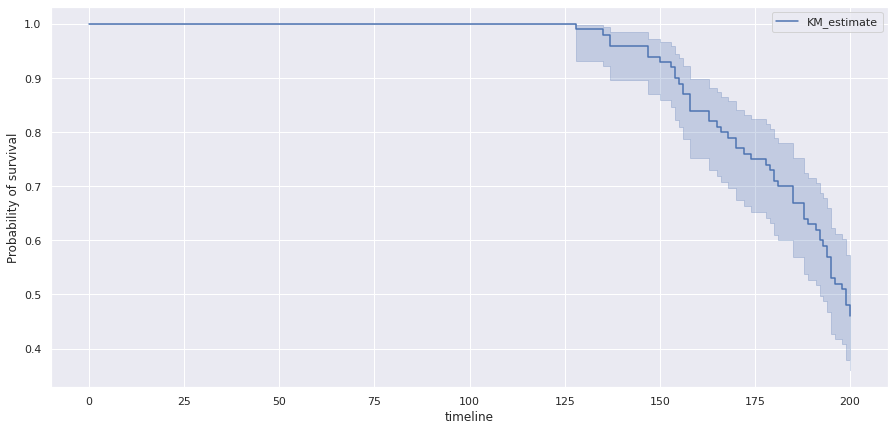

In [ ]:
# create kaplan meier curve
data = train_censored[index_names+['breakdown']].groupby('unit_nr').last()

plt.figure(figsize=(15,7))
survival = KaplanMeierFitter()
survival.fit(data['time_cycles'], data['breakdown'])
survival.plot()
plt.ylabel("Probability of survival")Ao
plt.show()
plt.close()

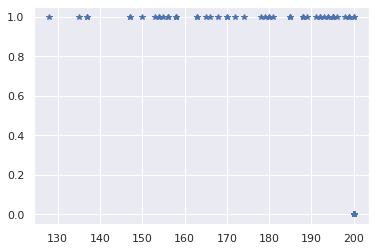

In [ ]:
plt.plot(data['time_cycles'], data['breakdown'],'*')

In [ ]:
data

,time_cycles,breakdown
unit_nr,,
1,192,1
2,200,0
3,179,1
4,189,1
5,200,0
...,...,...
96,200,0
97,200,0
98,156,1


The KaplanMeier curve provides us with some initial information of survival probabilities. For example, engines have a 100% probability of surviving the first 128 time_cycles. After that point the first engines start to break down, but there is still a 46% probability of the engine surviving past 200 time_cycles.

# **CoxTimeVaryingFitter**

I have tried several variations with the regular CoxPHFitter, but it did not yield good results for this particular case. The reason I wanted to use the regular CoxPHFitter is because it comes with a predict_expectation right out of the box, providing time till event (or in our case RUL) predictions.

Finally, I've setteled on the CoxTimeVaryingFitter. Which can leverage the timeseries nature of the data, as it is able to take multiple observations for each engine into account. The downside to this model is, its results are less intuitive to interpret. In general, higher partial hazards indicate a higher risk of failure, but this is no direct indication of time till event. For a more detailed explanation you can refer to the blog post.

In [ ]:
train_cols = index_names + remaining_sensors + ['start', 'breakdown']
predict_cols = ['time_cycles'] + remaining_sensors + ['start', 'breakdown']  # breakdown value will be 0

In [ ]:
train_censored[train_cols].head()

,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,start,breakdown
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,0,0
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,1,0
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,2,0
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,3,0
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,4,0


In [ ]:
ctv = CoxTimeVaryingFitter()
ctv.fit(train_censored[train_cols], id_col="unit_nr", event_col='breakdown', 
        start_col='start', stop_col='time_cycles', show_progress=True, step_size=1)

Iteration 8: norm_delta = 0.00000, step_size = 1.00000, ll = -63.86010, newton_decrement = 0.00000, seconds_since_start = 0.1Convergence completed after 8 iterations.


<lifelines.CoxTimeVaryingFitter: fitted with 18627 periods, 100 subjects, 54 events>

<lifelines.CoxTimeVaryingFitter: fitted with 18627 periods, 100 subjects, 54 events>
         event col = 'breakdown'
number of subjects = 100
 number of periods = 18627
  number of events = 54
partial log-likelihood = -63.86
  time fit was run = 2021-09-04 07:03:16 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
s_2         2.05       7.75       0.72             0.64             3.45                 1.90                31.64
s_3         0.07       1.07       0.04            -0.01             0.15                 0.99                 1.16
s_4         0.16       1.18       0.05             0.07             0.26                 1.07                 1.29
s_7        -1.09       0.34       0.50            -2.07            -0.11                 0.13                 0.90
s_8        -5.03       0.01       4.84           -14.51             4.45                 0.00                85.79
s_9        -0.02       0.98       0.04            -0.10             0.05                 0.91                 1.05
s_11        5.12     167.43       1.70             1.78             8.46                 5.95              4714.95
s_12       -1.14       0.32       0.53            -2.17            -0.10                 0.11                 0.90
s_13       12.90   3.99e+05       5.51             2.09            23.70                 8.09             1.97e+10
s_14        0.04       1.04       0.04            -0.04             0.12                 0.96                 1.13
s_15        5.07     159.96       9.53           -13.61            23.76                 0.00             2.09e+10
s_17        0.41       1.51       0.20             0.01             0.81                 1.01                 2.25
s_20       -5.13       0.01       2.02            -9.09            -1.17                 0.00                 0.31
s_21       -4.23       0.01       2.67            -9.46             1.01                 0.00                 2.75

              z      p   -log2(p)
covariate                        
s_2        2.85 <0.005       7.84
s_3        1.73   0.08       3.57
s_4        3.49 <0.005      11.03
s_7       -2.17   0.03       5.06
s_8       -1.04   0.30       1.74
s_9       -0.58   0.56       0.82
s_11       3.01 <0.005       8.56
s_12      -2.15   0.03       4.99
s_13       2.34   0.02       5.69
s_14       0.95   0.34       1.54
s_15       0.53   0.59       0.75
s_17       2.03   0.04       4.56
s_20      -2.54   0.01       6.49
s_21      -1.58   0.11       3.14
---
Partial AIC = 155.72
log-likelihood ratio test = 333.85 on 14 df
-log2(p) of ll-ratio test = 205.97

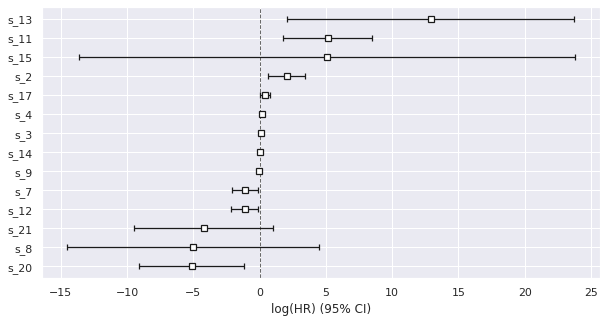

In [ ]:
ctv.print_summary()

plt.figure(figsize=(10,5))
ctv.plot()
plt.show()
plt.close()

In [ ]:
display(ctv.summary)

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
s_2,2.047076,7.745221,0.718074,0.639677,3.454475,1.895868e+00,3.164168e+01,2.850787,0.004361,7.841085
s_3,0.070081,1.072595,0.040596,-0.009485,0.149647,9.905601e-01,1.161425e+00,1.726324,0.084289,3.568509
s_4,0.164506,1.178811,0.047103,0.072187,0.256825,1.074856e+00,1.292819e+00,3.492512,0.000478,11.029195
s_7,-1.086248,0.337480,0.500341,-2.066899,-0.105597,1.265777e-01,8.997872e-01,-2.171014,0.029930,5.062258
s_8,-5.030594,0.006535,4.838076,-14.513049,4.451861,4.978091e-07,8.578647e+01,-1.039792,0.298436,1.744504
s_9,-0.022045,0.978196,0.038271,-0.097054,0.052964,9.075067e-01,1.054392e+00,-0.576025,0.564598,0.824703
s_11,5.120580,167.432485,1.703049,1.782666,8.458494,5.945688e+00,4.714953e+03,3.006714,0.002641,8.564765
s_12,-1.136686,0.320881,0.528755,-2.173028,-0.100345,1.138325e-01,9.045256e-01,-2.149739,0.031576,4.985035
s_13,12.897450,399292.512067,5.513919,2.090367,23.704532,8.087885e+00,1.971276e+10,2.339071,0.019332,5.692885



The log-likelihood is an indication of goodness of fit, values closer to zero indicate a better fit.
Looking at the p-values of the coefficients, sensors 9 and 15 have p-values > 0.50. However, removing the sensors returned a log-likelihood of -64.20, indicating the model becomes worse when removing these sensors. Last but not least the exp(coef) show the scaling hazard risk. E.g. an increment of 1 unit for the sensor values of sensor 11 increases the risk of breakdown by 167.43 [1-3]

In [ ]:
ctv

<lifelines.CoxTimeVaryingFitter: fitted with 18627 periods, 100 subjects, 54 events>

**predict and evaluate**

In [ ]:
df = train_censored.groupby("unit_nr").last()
df = df[df['breakdown'] == 0]  # get engines from dataset which are still functioning so we can predict their RUL
df_to_predict = df[df['breakdown'] == 0].copy()

In [ ]:
df_to_predict.head()

,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL,breakdown,start
unit_nr,,,,,,,,,,,,,,,,,,
2,200,642.74,1589.73,1406.28,553.13,2388.08,9065.78,47.44,521.69,2388.07,8144.69,8.4143,394,38.95,23.4101,87,0,199
5,200,642.45,1585.80,1404.94,553.35,2388.00,9088.92,47.43,521.18,2388.02,8166.87,8.4308,392,38.99,23.1455,69,0,199
7,200,642.33,1595.56,1415.32,553.40,2388.10,9079.46,47.71,520.70,2388.09,8142.49,8.4652,394,38.85,23.3170,59,0,199
9,200,643.40,1602.89,1431.95,552.29,2388.44,9224.87,47.98,520.35,2388.44,8279.79,8.4968,397,38.43,23.1008,1,0,199
10,200,642.72,1600.86,1424.28,552.86,2388.16,9090.00,47.91,520.68,2388.17,8166.02,8.4866,397,38.66,23.1687,22,0,199


In [ ]:
df_to_predict['RUL']

unit_nr
2      87
5      69
7      59
9       1
10     22
11     40
15      7
16      9
17     76
20     34
22      2
25     30
31     34
41     16
43      7
46     56
47     14
48     31
49     15
51     13
52     13
54     57
56     75
59     31
64     83
66      2
67    113
69    125
71      8
72     13
73     13
75     29
76     10
78     31
81     40
82     14
83     93
84     67
86     78
88     13
89     17
92    125
94     58
95     83
96    125
97      2
Name: RUL, dtype: int64

In [ ]:
predictions = ctv.predict_log_partial_hazard(df_to_predict[predict_cols]).to_frame()
predictions.rename(columns={0: "predictions"}, inplace=True)

# df_last = train.groupby('unit_nr').last()
predictions['RUL'] = df_to_predict.RUL.values
predictions.head(10)

,predictions,RUL
0,-1.128757,87
1,-1.607369,69
2,3.073379,59
3,21.145492,1
4,11.751951,22
5,4.391817,40
6,14.439742,7
7,20.540832,9
8,-3.512471,76
9,10.624723,34


When comparing the log_partial_hazard with computed RUL you can see it generally informs quite well about imminence of breakdown. Higher log_partial_hazards are returned for engines more at risk of breaking down most of the time.

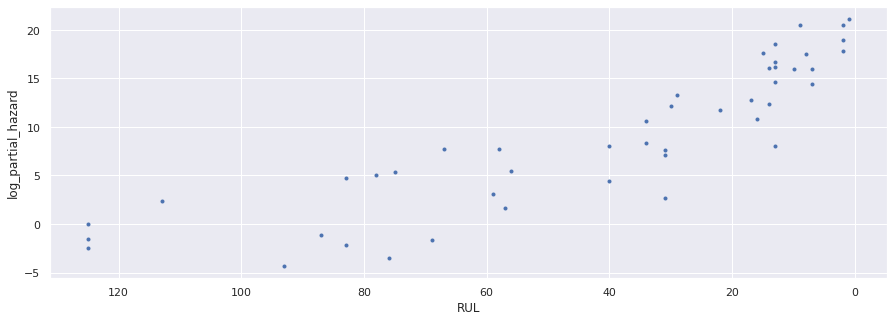

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(predictions['RUL'], predictions['predictions'], '.b')
xlim = plt.gca().get_xlim()
plt.xlim(xlim[1], xlim[0])
plt.xlabel('RUL')
plt.ylabel('log_partial_hazard')

plt.show()

Graph reconfirms higher log_partial_hazard generally informs on the imminence of breakdown.
Let's see how the hazard of the engines behave over time

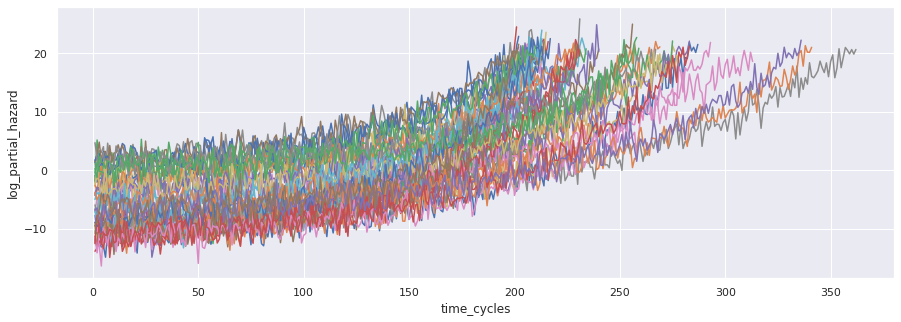

In [ ]:
# now lets look at some hazard trajectories
X = train.loc[train['unit_nr'].isin(df_to_predict.index)]
X_unique = len(X['unit_nr'].unique())

plt.figure(figsize=(15,5))
loop_vec = X['unit_nr'].unique().tolist()
for i in loop_vec:
    X_sub = X.loc[X['unit_nr'] == i]
    predictions = ctv.predict_partial_hazard(X_sub).values
    plt.plot(X_sub['time_cycles'].values, np.log(predictions))

plt.xlabel('time_cycles')
plt.ylabel('log_partial_hazard')
plt.show()

Note: The practical thing to do here would be to set a threshold after which maintenance should be performed.

However that doesn't really inform you of the remaining useful life.
You could in theory build another model to predict when this threshold is reached to get more of an indication of time till event.
I'm going to try and relate the hazard values directly to computed RUL

**Regressing the log_partial_hazard to RUL**

First predict the hazard for all engines in the set and check their relation to RUL

In [ ]:
df_hazard = train_censored.copy()
df_hazard['hazard'] = ctv.predict_log_partial_hazard(df_hazard)
df_hazard.head()

,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL,breakdown,start,hazard
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,125,0,0,-6.856341
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,125,0,1,-4.700971
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,125,0,2,-7.370774
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,125,0,3,-8.140738
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,125,0,4,-5.260691


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


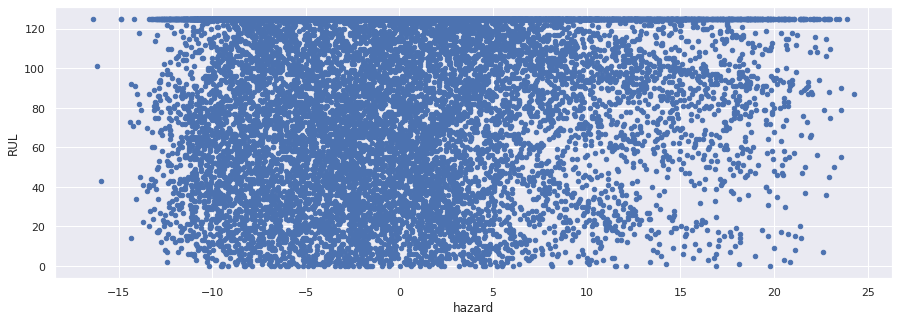

In [ ]:
df_hazard = df_hazard[df_hazard['hazard'].notna()]
df_hazard.plot('hazard', 'RUL', 'scatter', figsize=(15,5))
plt.xlabel('hazard')
plt.ylabel('RUL')
plt.show()

Note: The relationship is non-linear and there is quite a lot of spread, making it difficult to pinpoint RUL based on the log_partial_hazard.
We can try fitting an exponential model.

In [ ]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [ ]:
# https://stackoverflow.com/questions/52930401/how-to-get-a-robust-nonlinear-regression-fit-using-scipy-optimize-least-squares
from scipy.optimize import curve_fit

def exponential_model(z, a, b):
    return a * np.exp(-b * z)


**Idea of fit**
Note: Below graph is to showcase the idea. The line that was actually fitted is less accurate as it takes data points of all engines into account.

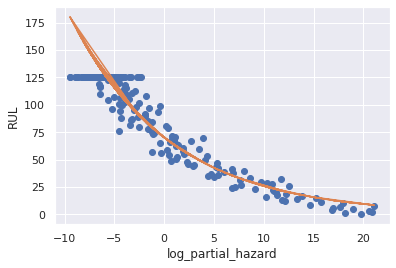

In [ ]:
# check specific unit_nr
y_hat = exponential_model(df_hazard.loc[df_hazard['unit_nr']==1, 'hazard'], 70, 0.1)

plt.plot(df_hazard.loc[df_hazard['unit_nr']==1, 'hazard'], df_hazard.loc[df_hazard['unit_nr']==1, 'RUL'], 'o',
        df_hazard.loc[df_hazard['unit_nr']==1, 'hazard'], y_hat)
plt.xlabel("log_partial_hazard")
plt.ylabel("RUL")
plt.show()
plt.close()

In [ ]:
df_hazard

,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL,breakdown,start,hazard
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,125,0,0,-6.856341
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,125,0,1,-4.700971
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,125,0,2,-7.370774
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,125,0,3,-8.140738
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,125,0,4,-5.260691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18622,92,108,642.49,1589.72,1406.16,553.30,2388.03,9054.89,47.34,521.98,2388.09,8136.25,8.4220,392,38.96,23.3638,125,0,107,19.704111
18623,92,109,642.55,1574.86,1405.23,554.50,2388.08,9057.16,47.51,521.93,2388.05,8134.65,8.4445,394,38.81,23.4610,125,0,108,20.031789
18624,92,110,642.73,1574.58,1398.92,553.90,2388.06,9055.03,47.31,521.89,2388.08,8135.06,8.4061,394,39.08,23.4057,125,0,109,20.655674
18625,92,111,642.56,1587.06,1411.23,553.88,2388.01,9059.56,47.47,522.02,2388.10,8137.19,8.4116,391,38.84,23.3873,125,0,110,20.823138


In [ ]:
df_hazard = df_hazard[df_hazard['RUL'].notna()]
popt, pcov = curve_fit(exponential_model, df_hazard['hazard'], df_hazard['RUL'])
popt  # the coefficients

array([ 9.13285091e+01, -4.12438046e-03])

In [ ]:

# prep test set
test = X_test.drop(labels=drop_labels, axis=1)
test['breakdown'] = 0
test['start'] = test['time_cycles'] - 1

In [ ]:
# predict and evaluate
y_hat = exponential_model(df_hazard['hazard'], *popt)
evaluate(df_hazard['RUL'], y_hat, 'train')

y_pred = ctv.predict_log_partial_hazard(test.groupby('unit_nr').last())
y_hat = exponential_model(y_pred, *popt)
evaluate(y_test, y_hat)

train set RMSE:39.1324409360461, R2:0.004931765975474733
test set RMSE:47.04994398118311, R2:-0.28191337008449824


In [ ]:
y_hat

0         949.885520
1         110.053929
2        1588.863730
3        3431.447895
4         192.614488
            ...     
20626            NaN
20627            NaN
20628            NaN
20629            NaN
20630            NaN
Name: hazard, Length: 18627, dtype: float64

# **Train on complete dataset**

In [ ]:



ctv2 = CoxTimeVaryingFitter()
ctv2.fit(train[train_cols], id_col="unit_nr", event_col='breakdown', 
        start_col='start', stop_col='time_cycles', show_progress=True)

Iteration 8: norm_delta = 0.00000, step_size = 1.00000, ll = -114.77106, newton_decrement = 0.00000, seconds_since_start = 0.1Convergence completed after 8 iterations.


<lifelines.CoxTimeVaryingFitter: fitted with 20631 periods, 100 subjects, 100 events>

In [ ]:

train['hazard'] = ctv2.predict_log_partial_hazard(train)
popt2, pcov2 = curve_fit(exponential_model, train['hazard'], train['RUL'])

y_hat = exponential_model(train['hazard'], *popt2)
evaluate(train['RUL'], y_hat, 'train')

y_pred = ctv2.predict_log_partial_hazard(test.groupby('unit_nr').last())
y_hat = exponential_model(y_pred, *popt2)
evaluate(y_test, y_hat)

train set RMSE:26.22636478059735, R2:0.6039289060308328
test set RMSE:26.58098880727918, R2:0.5908498441499572


Although it doesn't come as close to the SVR or time-series analysis solutions, part of the innaccuracy can be explained by fitting another model ontop of the predicted log_partial_hazard, which results in errors ontop of errors (as no model is perfect). I believe when you step away from the RUL paradigm we've been using and set a threshold for the log_partial_hazard this method could be very appropriate to define when maintenance is required.

I would like to give a special thanks to lifelines author Cameron Davidson-Pilon for taking the time to provide me with some pointers on how to best utilize the lifelines package for the dataset at hand!



# references
# [1] https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-are-the-likelihood-ratio-wald-and-lagrange-multiplier-score-tests-different-andor-similar/
# [2] https://www.reddit.com/r/statistics/comments/23sk6h/what_does_a_loglikelihood_value_indicate_and_how/
# [3] https://medium.com/@zachary.james.angell/applying-survival-analysis-to-customer-churn-40b5a809b05a


# reading materials
# Kaplan Meier Curve
# https://lifelines.readthedocs.io/en/latest/Survival%20analysis%20with%20lifelines.html
# https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator

# model interpretation & loglikelihood
# https://medium.com/@zachary.james.angell/applying-survival-analysis-to-customer-churn-40b5a809b05a
# https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-are-the-likelihood-ratio-wald-and-lagrange-multiplier-score-tests-different-andor-similar/
# https://www.reddit.com/r/statistics/comments/23sk6h/what_does_a_loglikelihood_value_indicate_and_how/


# Generic stuff
# https://towardsdatascience.com/churn-prediction-and-prevention-in-python-2d454e5fd9a5
# https://github.com/CamDavidsonPilon/lifelines/issues/619  # use CPH model with continuous variables
# https://towardsdatascience.com/survival-analysis-part-a-70213df21c2e
# https://en.wikipedia.org/wiki/Survival_analysis


# https://datascience.stackexchange.com/questions/14252/how-to-use-survival-analysis-for-predictive-maintenance-for-time-series-data
# https://square.github.io/pysurvival/tutorials/maintenance.html
# https://stats.stackexchange.com/questions/177175/survival-analysis-account-for-repeated-measures?noredirect=1&lq=1
# https://stats.stackexchange.com/questions/199744/using-survival-analysis-with-multiple-events

# belowlink did not work out the way I imagined, hence I switched to the timevaryingfitter
# https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html#clusters-correlations  
# https://lifelines.readthedocs.io/en/latest/Examples.html#correlations-between-subjects-in-a-cox-model

